In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
dataset = pd.read_csv("/content/weight-height.csv")


In [ ]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,NaN
3,Male,71.730978,NaN
4,Male,69.881796,NaN


In [ ]:
print(dataset.shape)
dataset.info()

(10000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9953 non-null   object 
 1   Height  9930 non-null   float64
 2   Weight  9918 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
dataset.isnull().sum()

Gender    47
Height    70
Weight    82
dtype: int64

### As dataset has some null values, so let treat these as **Missing values** & apply various method on it

### Replace with mean value

In [ ]:
data = dataset.copy()
data.fillna(data.mean(),inplace =True)

<ipython-input-7-d846dc3b2f12>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(),inplace =True)


In [ ]:
# For categorical feature:
print("Number of samples of Males: {} ".format(dataset.loc[dataset['Gender']=='Male'].shape[0]))
print("Number of samples of Females: {}".format(dataset.loc[dataset['Gender']=='Female'].shape[0]))

Number of samples of Males: 4976 
Number of samples of Females: 4977


In [ ]:
# As females are higher by just one, so we can replace the nan value with female but this will led 
# to imbalance class problem:
data['Gender'].fillna('Female',inplace=True)

In [ ]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### Fill with Random Number

In [ ]:
# For weights, let take the 160 pound as random value 
# For Height, let take the 65 inch as random value 
data =dataset.copy()
data['Weight'].fillna(160,inplace=True)
data['Height'].fillna(65,inplace=True)
data.isnull().sum()

Gender    47
Height     0
Weight     0
dtype: int64

## By  Linear regresssion

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def find_missing_values(data,feature):

    test = data[data[feature].isna()]
    train = data.dropna()
    # Preparing Data
    X_train = train.drop([feature], axis=1)
    y_train = train[feature]
    X_test = test.drop([feature], axis=1)
    # Getting ready a model to predict missing values
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    # Predictions
    y_pred = linear.predict(X_test)
    return y_pred 
    # data.loc[data['Age'].isnull(), 'Age'] = y_pred

In [ ]:
data = dataset.copy()
# One hot encoding
data = pd.get_dummies(data,columns= ['Gender'])
#Filling Weight
data.loc[data['Weight'].isnull(), 'Weight'] =  find_missing_values(data,'Weight')
#Filling Height
data.loc[data['Height'].isnull(), 'Height'] =  find_missing_values(data,'Height')
data.isnull().sum()


Height           0
Weight           0
Gender_Female    0
Gender_Male      0
dtype: int64

## By Interpolation

In [ ]:
data =dataset.copy()
data['Weight'].interpolate(limit_direction='both',inplace =True)
data['Height'].interpolate(limit_direction='both',inplace =True)
data.isnull().sum()

Gender    47
Height     0
Weight     0
dtype: int64

## By deleting rows

In [ ]:
data =dataset.copy()
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9801 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9801 non-null   object 
 1   Height  9801 non-null   float64
 2   Weight  9801 non-null   float64
dtypes: float64(2), object(1)
memory usage: 306.3+ KB


In [ ]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### From the above values, we can see, in the worst case , total number of rows which can have Null values will be ~200 which is 2% of the total number of samples, so we can go with deleting this rows to carry out further operations

In [ ]:
data.describe()

,Height,Weight
count,9801.000000,9801.000000
mean,66.354825,161.315358
std,3.844772,32.086281
min,54.263133,64.700127
25%,63.500826,135.771361
50%,66.308373,161.028752
75%,69.162470,187.028748
max,78.998742,269.989698


### From the above table, we found the mean, quartile range, standard deviation and other values of numerical features 

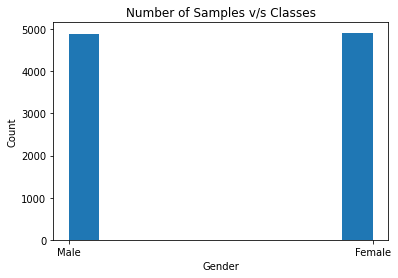

In [ ]:
plt.hist(data['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Samples v/s Classes')
plt.show()

### Dataset contain equal number of samples of each class, hence dataset is not biased toward particular class

### Visualization **Scatter plots**

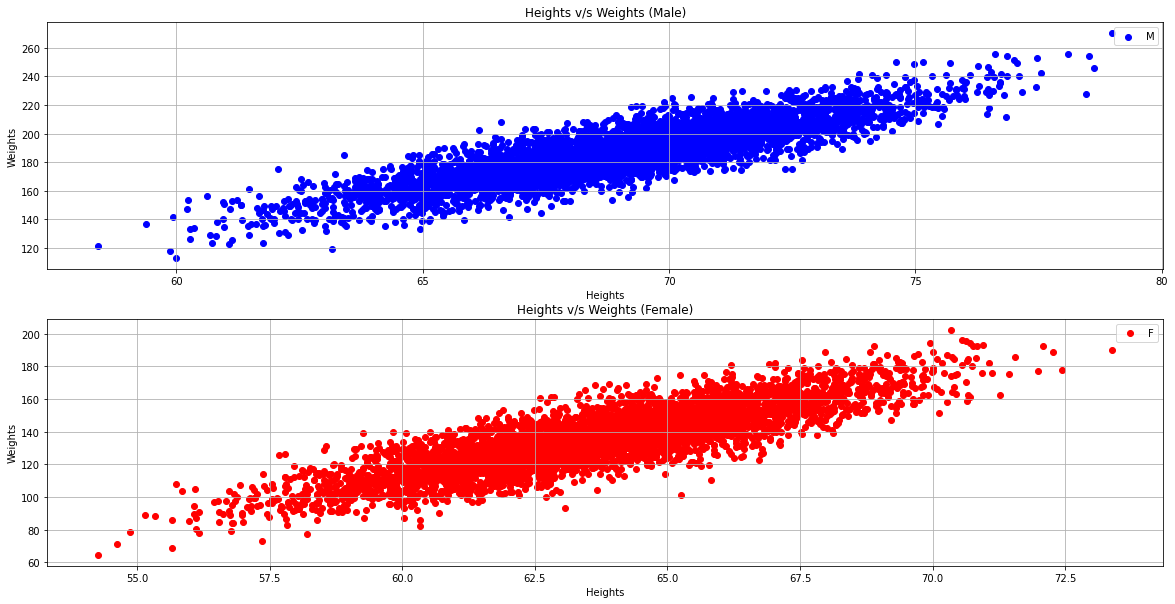

In [ ]:
fig,ax = plt.subplots(2,figsize=(20,10))

ax[0].scatter(data[data['Gender']=='Male']['Height'],data[data['Gender']=='Male']['Weight'], c='blue')
ax[0].set_title('Heights v/s Weights (Male)')
ax[0].set_xlabel('Heights')
ax[0].set_ylabel('Weights')
ax[0].legend('Male')
ax[0].grid('on')

ax[1].scatter(data[data['Gender']=='Female']['Height'],data[data['Gender']=='Female']['Weight'], c='red')
ax[1].set_title('Heights v/s Weights (Female)')
ax[1].set_xlabel('Heights')
ax[1].set_ylabel('Weights')
ax[1].legend('Female')
ax[1].grid('on')

plt.show()



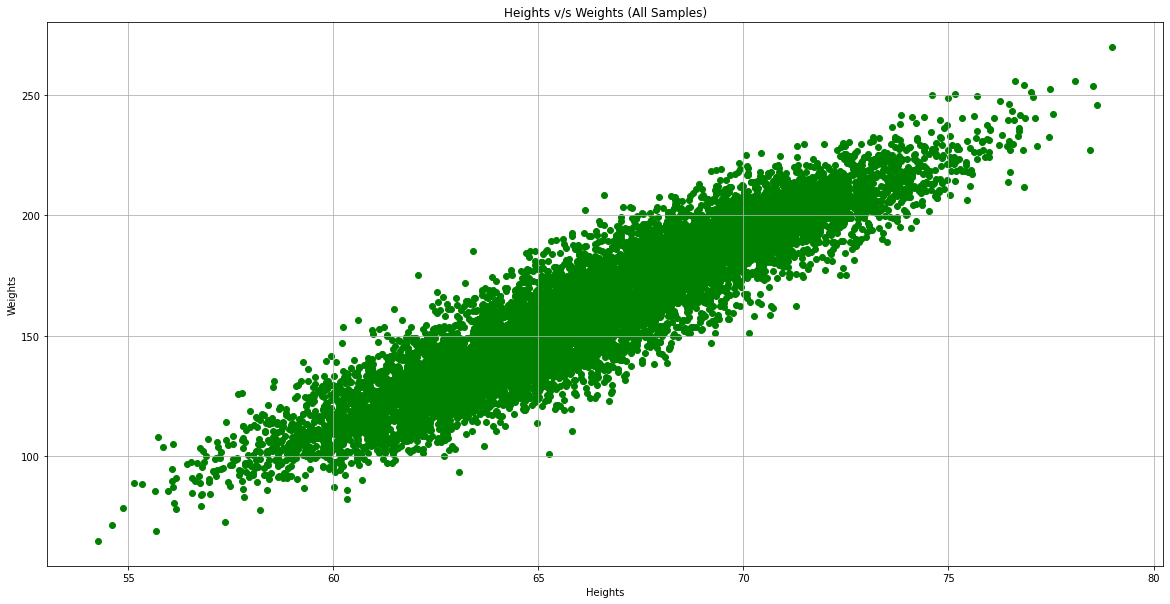

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data['Height'],data['Weight'],c='green')
plt.title('Heights v/s Weights (All Samples)')
plt.xlabel('Heights')
plt.ylabel('Weights')
plt.grid('on')
plt.show()

## Observations

<ul>
<li> Postive Correlation between weights & heights has been found</li>
<li> A Linear Regression model is one of the good choice to train the data </li>
<li> Males have comparitvely higher weights & heights as compare to females </li>
<li> In any distance-based model on this data, the weight feature will dominate over the height feature as for each height, weight feature have almost double times the value ( even more in some data samples)

## One Hot Encoding

In [ ]:
# 'Gender' is the nominal predictor
hot_encoded_data = pd.get_dummies(data,columns= ['Gender'])
hot_encoded_data.head()

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
5,67.253016,152.212156,0,1
6,68.785081,183.927889,0,1
7,68.348516,167.971111,0,1


#### Predictors represent the inputs to the model, so after one hot encoding we have four predictors

# Standardization 

In [ ]:
# Real predictors are 'Weight' & 'Height'
standard_data = data.copy()
standard_data['Weight'] = (data['Weight'] - data['Weight'].mean())/data['Weight'].std()
standard_data['Height'] = (data['Height'] - data['Height'].mean())/data['Height'].std()
standard_data.head()

,Gender,Height,Weight
0,Male,1.948670,2.511298
1,Male,0.631267,0.031014
5,Male,0.233613,-0.283710
6,Male,0.632094,0.704741
7,Male,0.518546,0.207433


In [ ]:
standard_data.describe()

,Height,Weight
count,9.801000e+03,9.801000e+03
mean,2.273505e-15,2.319903e-17
std,1.000000e+00,1.000000e+00
min,-3.144970e+00,-3.011107e+00
25%,-7.423066e-01,-7.961034e-01
50%,-1.208204e-02,-8.932360e-03
75%,7.302500e-01,8.013827e-01
max,3.288600e+00,3.386941e+00


### Scatter Plots of Standardized data

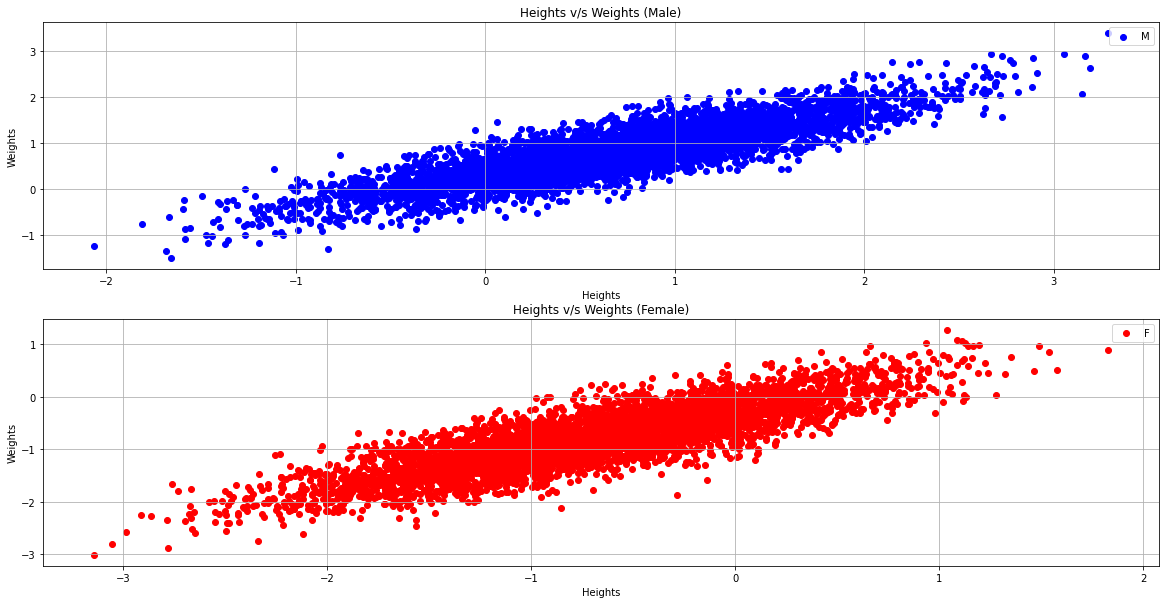

In [ ]:
fig,ax = plt.subplots(2,figsize=(20,10))

ax[0].scatter(standard_data[standard_data['Gender']=='Male']['Height'],standard_data[standard_data['Gender']=='Male']['Weight'], c='blue')
ax[0].set_title('Heights v/s Weights (Male)')
ax[0].set_xlabel('Heights')
ax[0].set_ylabel('Weights')
ax[0].legend('Male')
ax[0].grid('on')

ax[1].scatter(standard_data[standard_data['Gender']=='Female']['Height'],standard_data[standard_data['Gender']=='Female']['Weight'], c='red')
ax[1].set_title('Heights v/s Weights (Female)')
ax[1].set_xlabel('Heights')
ax[1].set_ylabel('Weights')
ax[1].legend('Female')
ax[1].grid('on')

plt.show()


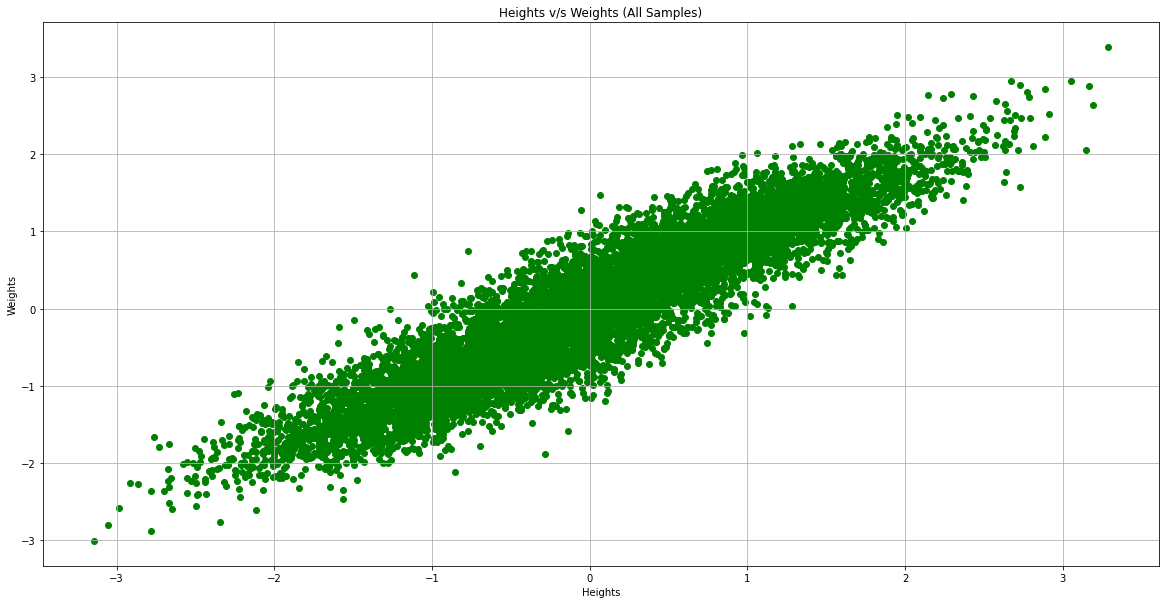

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(standard_data['Height'],standard_data['Weight'],c='green')
plt.title('Heights v/s Weights (All Samples)')
plt.xlabel('Heights')
plt.ylabel('Weights')
plt.grid('on')
plt.show()

### Observation from scatter plot

<ul>
<li> Shape of the scatter plots remain same as without standardization </li>
<li> Range of both Height & Weight feature has beed reduced to -3 to 3 </li>
<li> Now both Height & Weight feature has comparable scale, so it eleminates the dominance of Weight as one observed without standardization </li>
</ul>

# HEATMAP

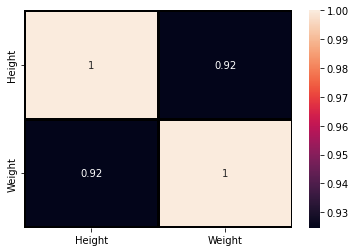

In [ ]:
correlation = data.corr()
sn.heatmap(correlation,linecolor='black',linewidth=2,annot =True)

#### High positive correlation between weight & height

# Skewness

In [ ]:
from scipy.stats import skew, norm
from scipy.stats import kurtosis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


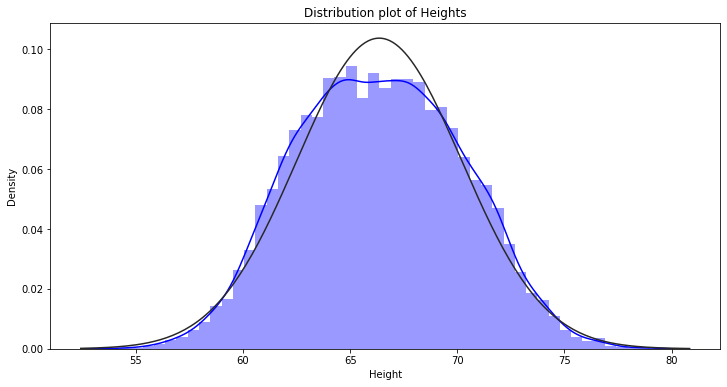

In [ ]:
plt.figure(figsize=(12,6))
sn.distplot(data['Height'],fit=norm,color='b')
plt.title('Distribution plot of Heights')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


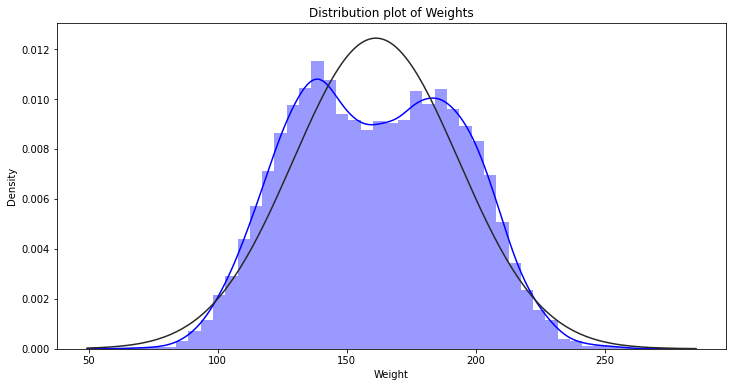

In [ ]:
plt.figure(figsize=(12,6))
sn.distplot(data['Weight'],fit=norm,color='b')
plt.title('Distribution plot of Weights')
plt.show()

In [ ]:
## Mathematically checking skewness:
print("Skewness of distribution of Height: {}".format(data['Height'].skew()))
print("Skewness of distribution of Weight: {}".format(data['Weight'].skew()))

Skewness of distribution of Height: 0.05180599965621933
Skewness of distribution of Weight: 0.036159290555335066


### As in the above graphs, distributions are fairly symmetrical & even mathematically value of skewness in feature vector lies in -0.5 to 0.5 range, So no transformation is required

# Outliers

In [ ]:
# Finding Kurtosis value of feature vectors
print("Kurtosis of distribution of Height: {}".format(kurtosis(data['Height'])))
print("Kurtosis of distribution of Weight: {}".format(kurtosis(data['Weight'])))

Kurtosis of distribution of Height: -0.4724676212584895
Kurtosis of distribution of Weight: -0.7912227755785839


### In the above distribution, there are not longer or fatty tails as compare with gaussian distribution and value of Kurtosis is less than 4, so all these rule out the possibility of Outliers

# Binning

### Equal frequency bins

In [ ]:
# Taking all height values & sorted them
heights = np.array(data['Height'])
heights.sort()     
heights= heights.tolist()

In [ ]:
# Finding Intervals
min_height = heights[0]
max_short_height =  heights[int((len(heights)/3))] # as we want to divide into 3 categories
max_medium_height = heights[int(2*len(heights)/3)]
max_tall_height = heights[len(heights)-1]

In [ ]:
# Creating bins
bins = [min_height,max_short_height,max_medium_height,max_tall_height]
labels = ['Short','Medium','Tall']
data['Height_categories'] =  pd.cut(data['Height'], bins=bins, labels=labels, include_lowest=True)


Tall Range: [68.1699946, 78.99874235]
Medium Range: [64.4678893, 68.1699946]
Short Range: [54.26313333, 64.4678893]


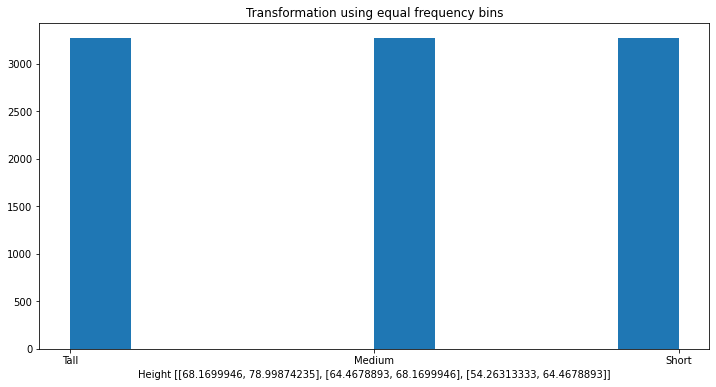

In [ ]:
# PLotting
fig =plt.figure(figsize=(12,6))

Tall_range = [max_medium_height,max_tall_height]  #
print("Tall Range: {}".format(Tall_range))

Medium_range = [max_short_height,max_medium_height]
print("Medium Range: {}".format(Medium_range))
 
Short_range =[min_height,max_short_height]
print("Short Range: {}".format(Short_range))


plt.hist(data['Height_categories'])
plt.title("Transformation using equal frequency bins")
plt.xlabel("Height {}".format([Tall_range,Medium_range,Short_range]))
plt.show()

## By equal Width bins

In [ ]:
# Finding Width
width=(heights[len(heights)-1]-heights[0])/3


In [ ]:
# Creating bins
bins = [min_height , min_height + width, min_height + 2*width , min_height + 3*width ]
labels = ['Short','Medium','Tall']
data['Height_categories'] =  pd.cut(data['Height'], bins=bins, labels=labels, include_lowest=True)


Tall Range: [68.1699946, 78.99874235]
Medium Range: [64.4678893, 68.1699946]
Short Range: [54.26313333, 64.4678893]


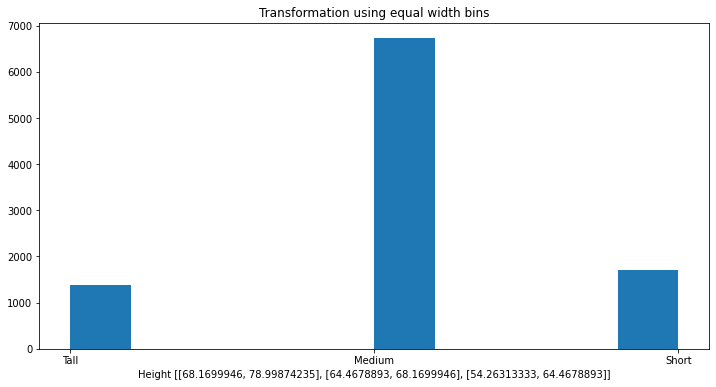

In [ ]:
# plotting
fig =plt.figure(figsize=(12,6))

Tall_range = [max_medium_height,max_tall_height]  #
print("Tall Range: {}".format(Tall_range))

Medium_range = [max_short_height,max_medium_height]
print("Medium Range: {}".format(Medium_range))
 
Short_range =[min_height,max_short_height]
print("Short Range: {}".format(Short_range))


plt.hist(data['Height_categories'])
plt.title("Transformation using equal width bins")
plt.xlabel("Height {}".format([Tall_range,Medium_range,Short_range]))
plt.show()